# MBA FIAP Inteligência Artificial & Machine Learning

## Visão Computacional: Análise de Imagens Médicas

> Atenção: este notebook foi desenhado para funcionar no **Google Collab**. Se pretende executar localmente prefira a versão local deste notebook, sem o sufixo ```-collab```.


## 1. Introdução

As tecnologias de imagens médicas estão cada vez mais integradas aos sitemas de visão computacional, incluindo as imagens de raio-x.

Modelos de equipamentos modernos geram imagens digitais deste tipo de exame, proporcionando análises mais completas e menos _ad-hoc_, com isso algumas pré-análises podem ser realizadas por aplicações baseadas em inteligência artificial para confirmar ou sugerir diagnósticos ao profissional responsável pelo exame.

No campo dos diagósticos por raios-x, a pnenumonia é uma das enfermidades onde seu uso é um dos mais aplicados para determinar o curso de tratamento.

<p align="center">
    <img src="/imagens/NORMAL2-IM-1422-0001.jpeg">
</p>

## 2. Instruções

Este projeto final tem como objetivo explorar os conhecimentos adquiridos nas aulas práticas.

Por meio de uma trilha guiada, iremos constuir um modelo que seja capaz de classificar imagens de raio-x para determinar se a determinada pessoa está com alguma condição que necessita maiores cuidados.

De acordo com as imagens disponíveis para o treinamento e validação, será de critério do grupo selecionar as quantidades ideais ou até mesmo pré-processar as imagens para obter o melhor resultado, nos principais indicadores de performance, como precisão, sensibilidade e pontuação F1.

Este projeto poderá ser feita por grupos de até 4 pessoas.
Caso este projeto seja substitutivo, deverá ser realizado por apenas uma pessoa.

| Nome dos Integrantes     | RM            | Turma |
| :----------------------- | :------------- | :-----: |
| Fábio Pedroso             | RM 336654      | `14IA` |
| Letícia Okamoto           | RM 336901      | `14IA` |

Por ser um projeto guiado, fique atento quando houver as marcações **Implementação** indica que é necessário realizar alguma implementação em Python no bloco a seguir onde há a inscrição ```##IMPLEMENTAR``` e **Resposta** indica que é esperado uma resposta objetiva relacionado a algum questionamento. 

**Cada grupo pode utilizar nas respostas objetivas quaisquer itens necessários que enriqueçam seu ponto vista, como gráficos, fotos e, até mesmo, trechos de código-fonte.**

Pode-se utilizar quantos blocos forem necessários para realizar determinadas implementações ou utilizá-las para justificar as respostas. Não é obrigatório utilizar somente o bloco indicado.

Ao final não se esqueça de subir os arquivos do projeto nas contas do GitHub de cada membro, ou subir na do representante do grupo e os membros realizarem o fork do projeto.

A avaliação terá mais ênfase nos seguintes tópicos de desenvolvimento do projeto:
 
1. __Pré-Processamento__
2. __Classificação__
3. __Performance__
4. __Conclusões Finais__

## 3.1 Detalhe do problema: a pneunomia

Fonte: [artigo](https://drauziovarella.uol.com.br/doencas-e-sintomas/pneumonia) do Dr. Drauzio Varella.

Pneumonias são infecções que se instalam nos pulmões, órgãos duplos localizados um de cada lado da caixa torácica. Podem acometer a região dos alvéolos pulmonares onde desembocam as ramificações terminais dos brônquios e, às vezes, os interstícios (espaço entre um alvéolo e outro).

Basicamente, pneumonia é provocada pela penetração de um agente infeccioso ou irritante (bactérias, vírus, fungos e por reações alérgicas) no espaço alveolar, onde ocorre a troca gasosa. Esse local deve estar sempre muito limpo, livre de substâncias que possam impedir o contato do ar com o sangue.

Exame clínico, auscultação dos pulmões e radiografias de tórax são recursos essenciais para o diagnóstico de pneumonia.

<p align="center">
    <img src="imagens/pneumonia.jpeg">
</p>

## 3.2 Diagnóstico por raio-x

O exame de raio-x traz diferenças em cada tipo de diagnóstico, sendo considerado os seguintes grupos de análise: **normal** (ou controle) onde não há nenhuma condição de infeção, **bacterial pneumonia** (pneumonia bacteriana) que representa a condição de infecção bacteriana e **viral pneumonia** que indica a condição de infecção vira. 

<p align="center">
<img src="imagens/raiox.png" height="60%" width="60%">
</p>

As imagens de controle não são mais brancas ao centro que é onde fica o coração. Já nas imagens com pneumonia é possível notar regiões brancas ao redor dos pulmões, que é como o exame identifica as secreções responsáveis pela infeçcão.

Quando mais regiões brancas ao redor do pulmão mais severa é a inflamação e menos se observa dos detalhes dos pulmões, ficando um pouco esmaecido diante desta condição.

## 4.1 Problema

Construir um classificador utilizando _transfer learning_ para identificar as seguintes classes: **controle**, **pneumonia bacteriana** e **pneumonia viral**.

Para construir este classificador, utilize o dataset do [Kaggle Chest Ray Pneumonia](https://www.kaggle.com/paultimothymooney/chest-xray-pneumonia) e organize os dados de forma a separar em cada uma das classes que já estão definidas no diretório ```raiox```, sendo ```controle``` para as imagens normais (sem inflamação), ```bacteria``` para as imagens de pneumonia bacteriana e ```viral``` para as imagens de pneumonia viral.

Determine a quantidade de imagens a serem treinadas e validadas. Utiliza pelo menos, 100 imagens para cada classe.

Compare os resultados com pelo menos 3 classificadores, obtendo os valores de **precisão (precision)**, **sensibilidade (recall)** e **pontuação F1 (F1 Score)**. No guia abaixo, foi indicado os seguintes modelos: ResNet50, VGG16 e VGG19. 

>Importante: a escolha do número de imagens devem ser o suficiente para alcançar o valor de **precisão** mínima de 70%.
Note que as imagens de pneumonia bacteria e viral estão misturadas dentro da pasta ```PNEUMONIA```. É necessário separar as imagens manualmente tendo como base o sufixo. As imagens que terminal com ```_virus``` se referem a pneumoria viral e as que terminam com ```_bacteria``` se referem a pneumonia bacteriana.

A construção do modelo será utilizada o framework Keras.

**Pergunta**: Qual o número de imagens que foram selecionadas para cada classe?

**Resposta**: 1000

## 4.2 Componentes obrigatórios

Todas as bibliotecas já estão instaladas no Google Colab.

* Keras
* Tensorflow
* Pillow
* Matplotlib

In [ ]:
import os

import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

%matplotlib inline

from tensorflow.keras.models import Sequential, load_model, model_from_json
from tensorflow.keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D, Activation
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import VGG16, ResNet50, VGG19
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras import Model, layers
from tensorflow.keras import optimizers

import tensorflow.keras.backend as K

## 4.3 Carregando imagens de treinamento e validação

Selecione a melhor divisão entre dados de treinamento e validação. O número deverá ser representado em número fracionário, 5% equivale a 0.05, por exemplo.

> Você pode _montar_ o drive do Google Drive se precisar e quiser armazenar as imagens nesta plataforma. Como o Colab é efêmero, se você copiar os arquivos para o ambiente eles serão apagados depois do fim da sessão. Acesse [esta](https://medium.com/@maxwellcsm/colaboratory-acessando-os-arquivos-do-google-drive-d08ef9157dbf) referência para saber mais como o recurso funciona, inclusive recomenda-se essa abordagem de montar o próprio Google Drive.

Se não for utilizar o Google Drive, crie as pastas que serão utilizadas para armazenar as imagens.

### 4.3.1 Utilizando Google Drive

Se usar o Google Drive para armazenar as imagens utilize o comando abaixo para montar seu drive.
Você pode navegar pelas pastas pelo painel ao lado.

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/Visao computacional/Trabalho_imagens_medicas

/content/drive/MyDrive/Colab Notebooks/Visao computacional/Trabalho_imagens_medicas


### 4.3.2 Utilizando o armazenamento efêmero

Se optar pelo armazenamento efêmero você precisa enviar os arquivos de imagens (arrastar e soltar) para as pastas que deverão ser criadas pelo comando a seguir.

In [ ]:
!mkdir raiox/
!mkdir raiox/normal
!mkdir raiox/pneumonia_bacteriana
!mkdir raiox/pneumonia_viral

Defina o nome da pasta onde contém as sub-pastas referente aos 3 tipos de classe. Se optar pelo armazenamento efêmero a pasta será ```raiox```. Se optar pelo Goolge Drive, indique o caminho da pasta.

In [ ]:
## IMPLEMENTE
divisao_treino_validacao = 0.3
nome_pasta_raiz_imagens = "./raiox/"

O caminho abaixo da pasta ```raiox``` pode ser alterado caso você opte por utilizar uma pasta específica do seu Google Drive. Neste caso, certifique que dentro delas tem as sub-pastas referentes as imagens normal, pneumonia bacteriana e viral.

In [ ]:
train_datagen = ImageDataGenerator(validation_split=divisao_treino_validacao)

train_generator = train_datagen.flow_from_directory(
    nome_pasta_raiz_imagens,
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="training")

Found 2100 images belonging to 3 classes.


In [ ]:
val_generator = train_datagen.flow_from_directory(
    nome_pasta_raiz_imagens,
    batch_size=32,
    class_mode="categorical",
    color_mode="rgb",
    target_size=(224,224),
    subset="validation")

Found 900 images belonging to 3 classes.


In [ ]:
train_generator.class_indices, val_generator.class_indices

({'normal': 0, 'pneumonia_bacteriana': 1, 'pneumonia_viral': 2},
 {'normal': 0, 'pneumonia_bacteriana': 1, 'pneumonia_viral': 2})

## 4.4 Modelos de transfer learning

O Keras já possui classes especializadas para os seguintes modelos de deep-learning treinados com o conjunto de dados [ImageNet](http://www.image-net.org/):
  
* Xception
* VGG16
* VGG19
* ResNet50
* InceptionV3
* InceptionResNetV2
* MobileNet
* DenseNet
* NASNet
* MobileNetV2

Mais detalhes, veja na [documentação do Keras](https://keras.io/applications/).

Para este estudo, vamos utilizar para avaliação as seguintes arquiteturas: RestNet50, VGG15 e VGG19.

## 4.5 Indicadores de desempenho

O Keras não possui os indicadores de desempenho como precisão, sensibilidade e pontuação f1 por padrão, portanto precisamos implementar externamente.

In [ ]:
def recall_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    possible_positives = K.sum(K.round(K.clip(y_true, 0, 1)))
    recall = true_positives / (possible_positives + K.epsilon())
    return recall

def precision_score(y_true, y_pred):
    true_positives = K.sum(K.round(K.clip(y_true * y_pred, 0, 1)))
    predicted_positives = K.sum(K.round(K.clip(y_pred, 0, 1)))
    precision = true_positives / (predicted_positives + K.epsilon())
    return precision

def f1_score(y_true, y_pred):
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)
    return 2*((precision*recall)/(precision+recall+K.epsilon()))

### 4.5.1 Arquitetura ResNet50

**Pergunta**: Explique como é constituída a arquitetura do ResNet50? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: ResNet50 é uma rede neural composta por 50 camadas, sendo 48 convolucionais, 1 MaxPool e 1 camada Average Pool. 

Uma característica das ResNet(Residual Networks) é o uso de “identity shortcut connections”, um atalho que conecta o valor de input de um grupo de camadas convolucionais com a sua saída. Essa técnica é uma forma de amenizar o problema do esvaecimento do gradiente, enfrentado por redes de deep learning, como o gradiente é retropropagado para camadas anteriores, a multiplicação repetida pode tornar o gradiente extremamente pequeno. Como resultado, conforme a rede se aprofunda, seu desempenho fica saturado ou mesmo começa a degradar rapidamente.

Visualizando uma “identity shortcut connections”:
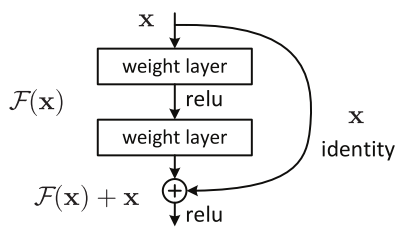

A ResNet50 é composta por 4 etapas, distribuidas da seguinte forma:
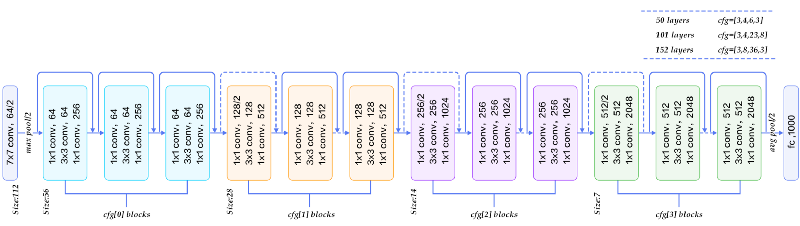

Essa arquitetura pode ser utilizada em tarefas de visão computacional como classificação de imagens, detecção e localização de objetos. Também pode ser aplicado em outras tarefas a fim de proporcionar o benefício de profundidade e reduzir também as despesas computacionais.

<br>
 <font size="2"> Fonte: <a href="https://towardsdatascience.com/understanding-and-coding-a-resnet-in-keras-446d7ff84d33" >Understanding and Coding a ResNet in Keras | by Priya Dwivedi</a>,
<a href="http://www.lapix.ufsc.br/ensino/visao/visao-computacionaldeep-learning/deep-learningglossario/?lang=en#ResNet">Deep Learning::Glossário - LAPIX</a></font>


---



A técnica de transfer learning consiste de utilizar o mesmo modelo e treiná-lo para outas imagens. Por tal motivo, excluímos a última camada para modelar com as classes que definimos, ou seja, **controle**, **bacteriana** e **viral**.

Informe a quantidade de classes a serem classificadas.

In [ ]:
## IMPLEMENTE

qtde_classes = 3

In [ ]:
conv_base = ResNet50(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, None, None, 3 0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, None, None, 6 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, None, None, 6 256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [ ]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

O número de épocas define quantas vezes o modelo irá treinar e validar o erro, assim ajustando os pesos para melhor convergência.
Escolha o número adequado de épocas para alcançarmos pelo menos **70% de precisão de validação**.

In [ ]:
## IMPLEMENTE

qtde_epocas = 10

In [ ]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 89s 18s/step - loss: 1.8512 - precision_score: 0.4036 - recall_score: 0.3439 - f1_score: 0.3696 - val_loss: 1.2573 - val_precision_score: 0.4566 - val_recall_score: 0.4000 - val_f1_score: 0.4263
Epoch 2/10
5/5 [==============================] - 74s 16s/step - loss: 1.0444 - precision_score: 0.5201 - recall_score: 0.4220 - f1_score: 0.4652 - val_loss: 0.6536 - val_precision_score: 0.7760 - val_recall_score: 0.6938 - val_f1_score: 0.7323
Epoch 3/10
5/5 [==============================] - 66s 14s/step - loss: 0.6752 - precision_score: 0.7476 - recall_score: 0.6396 - f1_score: 0.6884 - val_loss: 0.5774 - val_precision_score: 0.7856 - val_recall_score: 0.7125 - val_f1_score: 0.7467
Epoch 4/10
5/5 [==============================] - 63s 13s/step - loss: 0.6373 - precision_score: 0.7728 - recall_score: 0.7100 - f1_score: 0.7398 - val_loss: 0.5198 - val_precision_score: 0.7970 - val_recall_score: 0.7625 - val_f1_score: 0.7793
Epoch 5/10
5/5 [====

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

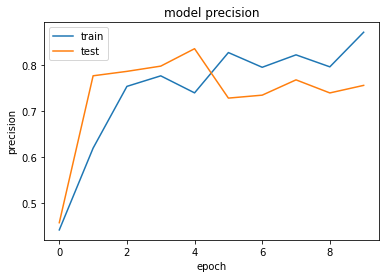

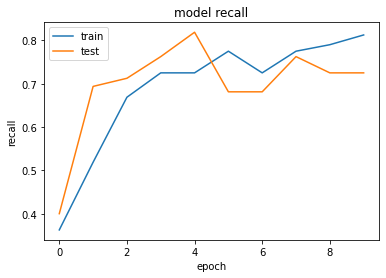

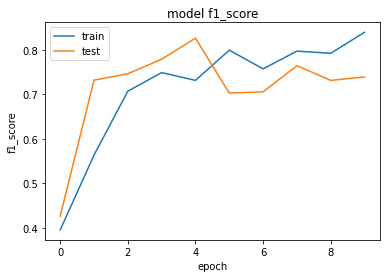

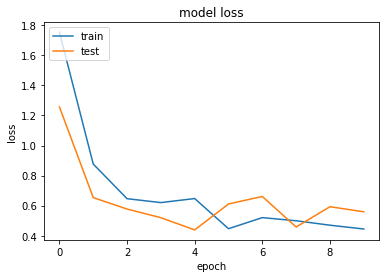

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: Pelos gráficos é possível perceber que o modelo estava convergindo, uma vez que a perda estava diminuindo e os demais indicadores crescendo, o que indica que ainda não tinha chegado ao seu potencial máximo. Também é possível perceber que em algumas épocas a base de teste obteve melhores resultados do que o de treino, mas não teve um comportamento padrão ao decorrer das épocas, tendo no final se distanciado um pouco dos indicadores da base de teste.
Os indicadores de precisão e sensibilidade terminaram com valores próximos, o que nos diz que o modelo estava classificando falsos negativos e falsos positivos na mesma medida, o que é bom visto que temos a mesma quantidade de imagens para as três classes.



**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Precisão: 75,51%, sensibilidade: 72,50%, f1-score: 73,95%.

### 4.5.2 Arquitetura VGG16

**Pergunta**: Explique como é constituída a arquitetura do VGG16? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: VGG16 é uma rede neural convolucional composta por 16 camadas, em que as camadas covolucionais, com ReLu como função de ativação, são seguidas por uma camada de max pooling, para redução da dimensionalidade. Ao final, são adicionadas 3 camadas Fully connected e uma soft max.

A arquitetura possui como input as dimensões (224, 224, 4), imagens com tamanho 224x224 em canal RGB. 

As camadas convolucionais seguintes utilizam filtros bem pequenos de 3x3 pixels, que são o menor tamanho para capturar a noção de esquerda/direita, centro, e acima/abaio. A convolução nessas camadas é fixada em 1 pixel, dessa forma, o preenchimento espacial da camada de entrada tem a resolução espacial preservada. 

As camadas max pooling são executadas em janelas de 2x2 pixels, reduzindo pela metada as dimenções verticais e horizontais da imagem.

Por fim, as duas primeiras camadas totalmente conectadas possuem 4096 canais, e a terceira possui 1000 canais para classificar as 1000 categorias do desafio ILSVRC(ImageNet Large-Scale Visual Recognition Challenge), desafio para o qual a arquitetura foi proposta e no qual alcançou 92,7% de precisão.

<img src='https://drive.google.com/uc?id=1F9XJ4Jf6EmafjF6iKTyIUxLs_MkQe-R_'>

<br>

<font size="2"> Fontes: <a href="https://ww2.inf.ufg.br/~anderson/deeplearning/Deep%20Learning%20-%20Redes%20Neurais%20Profundas%20VGG%20Net.pdf" >VERY DEEP CONVOLUTIONAL NETWORKS FOR LARGE-SCALE IMAGE RECOGNITION - VGG</a>,<br>
<a href="https://neurohive.io/en/popular-networks/vgg16/">VGG16 - Convolutional Network for Classification and Detection</a></font>


---



In [ ]:
conv_base = VGG16(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 168s 37s/step - loss: 2.4099 - precision_score: 0.4413 - recall_score: 0.4301 - f1_score: 0.4356 - val_loss: 1.5604 - val_precision_score: 0.5249 - val_recall_score: 0.4812 - val_f1_score: 0.5020
Epoch 2/10
5/5 [==============================] - 165s 37s/step - loss: 1.1792 - precision_score: 0.6017 - recall_score: 0.5655 - f1_score: 0.5825 - val_loss: 0.9091 - val_precision_score: 0.7134 - val_recall_score: 0.7000 - val_f1_score: 0.7065
Epoch 3/10
5/5 [==============================] - 160s 35s/step - loss: 0.8301 - precision_score: 0.7439 - recall_score: 0.6985 - f1_score: 0.7203 - val_loss: 0.7208 - val_precision_score: 0.7230 - val_recall_score: 0.7063 - val_f1_score: 0.7144
Epoch 4/10
5/5 [==============================] - 159s 35s/step - loss: 0.9478 - precision_score: 0.6679 - recall_score: 0.6541 - f1_score: 0.6608 - val_loss: 0.6848 - val_precision_score: 0.8157 - val_recall_score: 0.8000 - val_f1_score: 0.8076
Epoch 5/10
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

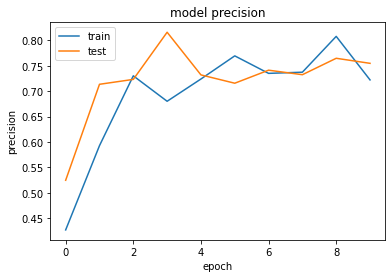

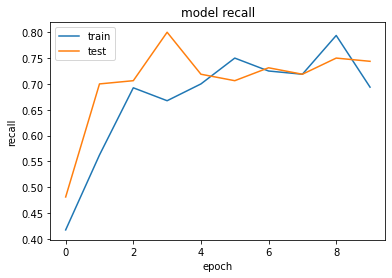

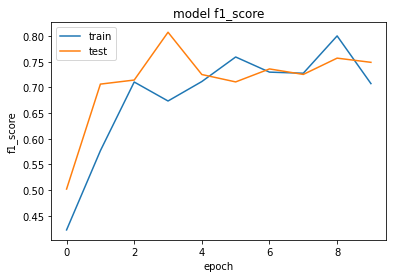

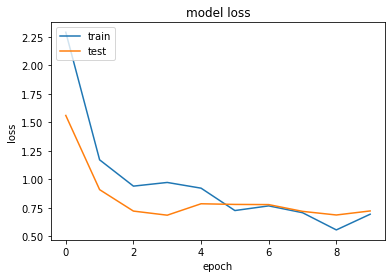

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: É possível perceber que para a base de teste o modelo estava estável a partir da época 4, pois todos os indicadores não sofreram muita variação. Quanto a base de treino, ainda estava instável, o que pode indicar que o modelo ainda não havia chego no seu potencial, terminando com uma queda no f1 e um aumento nas perdas.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Precisão: 75,46%, sensibilidade: 74,37%, f1-score: 74,90%.

### 4.5.3 Arquitetura VGG19

**Pergunta**: Explique como é constituída a arquitetura do VGG19? *Utilize, se necessário, gráficos, projetos que utilizam essa arquitetura. Detalhe também sua topologia em camadas e mostre quais as situações essa arquitetura pode ter mais êxito e quais cenários não tem.*

**Resposta**: A VGG19n é uma arquitetura que possui 19 camadas, sendo 16 camadas convolucionais e 3 totalmente conectadas.

Assim como a VGG16, também possui input de (224, 224, 3), intercala grupos de camadas convolucionais com uma camada de max pooling, utiliza filtros 3x3 e ao final da arquiterura utiliza a softmax para classificação em 1000 categorias.

A diferença entre VGG16 e a VGG19 está na existência de 3 camadas convolucionais a mais, localizadas ao final dos três últimos conjuntos de camadas convolucionais.

<img src='https://drive.google.com/uc?id=1Fn7GknrQGecZrGwvsVqhxexKe_nqGce4'>

<br>

<font size="2"> Fontes: <a href="https://www.researchgate.net/publication/326421398_Very_Deep_Convolutional_Neural_Networks_for_Complex_Land_Cover_Mapping_Using_Multispectral_Remote_Sensing_Imagery" >Very Deep Convolutional Neural Networks for Complex Land Cover Mapping Using Multispectral Remote Sensing Imagery</a>,<br>
<a href="https://iq.opengenus.org/vgg19-architecture/">Understanding the VGG19 Architecture</a></font>


---



In [ ]:
conv_base = VGG19(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         [(None, None, None, 3)]   0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, None, None, 64)    1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, None, None, 64)    36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, None, None, 64)    0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, None, None, 128)   73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, None, None, 128)   147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, None, None, 128)   0   

In [ ]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 209s 46s/step - loss: 3.5833 - precision_score: 0.3926 - recall_score: 0.3878 - f1_score: 0.3901 - val_loss: 1.1191 - val_precision_score: 0.6174 - val_recall_score: 0.5813 - val_f1_score: 0.5986
Epoch 2/10
5/5 [==============================] - 205s 46s/step - loss: 1.2406 - precision_score: 0.6217 - recall_score: 0.6111 - f1_score: 0.6163 - val_loss: 1.0816 - val_precision_score: 0.6510 - val_recall_score: 0.6438 - val_f1_score: 0.6473
Epoch 3/10
5/5 [==============================] - 206s 46s/step - loss: 1.0180 - precision_score: 0.6853 - recall_score: 0.6524 - f1_score: 0.6680 - val_loss: 1.0366 - val_precision_score: 0.6712 - val_recall_score: 0.6500 - val_f1_score: 0.6604
Epoch 4/10
5/5 [==============================] - 204s 46s/step - loss: 0.8526 - precision_score: 0.7021 - recall_score: 0.6806 - f1_score: 0.6910 - val_loss: 0.9458 - val_precision_score: 0.6962 - val_recall_score: 0.6875 - val_f1_score: 0.6918
Epoch 5/10
5/5 [

Um modelo que converge bem possui o gráfico de perda (*loss*) descendente e os gráfico de precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*) em acendente.

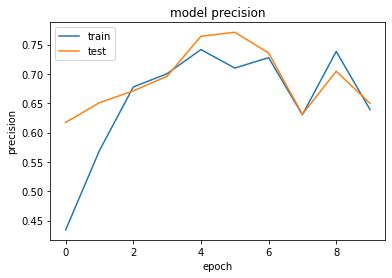

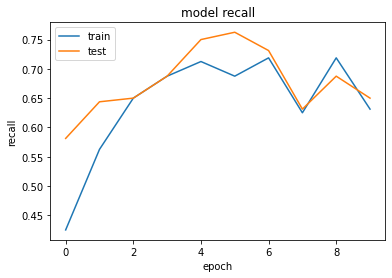

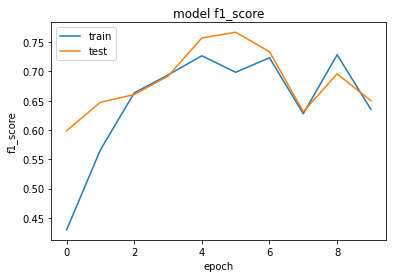

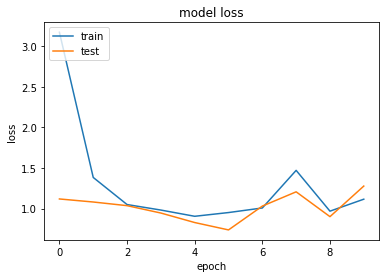

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

**Pergunta**: Avalie os gráficos de perda (*loss*), precisão (*precision*), sensibilidade (*recall*) e pontuação f1 (*f1 score*)  e explique o comportamento de ambos no que tange a convergência do modelo.

**Resposta**: O gráfico de perda nos mostra valores elevados, terminando em ascensão, e os demais indicadores apresentam comportamento instável terminando de forma decrescente. Apesar disso, os comportamentos das bases de treino e teste foram parecidos e próximos, o que indica que não há overfitting. Os gráficos de precisão e sensibilidade apresentaram formas parecidas, o que é bom uma vez que temos a mesma quantidade de imagens em todas as classes.

**Pergunta**: Quais são os valores de **precisão (precision)**, **sensibilidade (recall)** de validação? 

*Estes valores são exibidos durante o treinamento, utilize a última saída, exemplo:*

```
Epoch 10/10 [==============================] - 45s 9s/step - loss: 0.1234 - precision_score: 0.9742 - recall_score: 0.9683 - f1_score: 0.9712 - val_loss: 0.8819 - val_precision_score: 0.6912 - val_recall_score: 0.5649 - val_f1_score: 0.6216```

No caso acima, o valor de precisão, sensibilidade e pontuação de validação são, respectivamente, 69,12%, 56,49% e 62,16%.

**Resposta**: Precisão: 65,00%, sensibilidade: 65,00%, f1-score: 65,00%.

## 4.6 Compartivo de arquiteturas

Preencha a tabela abaixo com os valores dos indicadores de performance apresentados.

_O cálculo do F1-Score é dado por 2 * (Precisão * Sensibilidade) / (Precisão + Sensibilidade)._

| Modelo   | Precisão (*Precision*) | Sensibilidade (*Recall*) | F1-Score |
|----------|----------|---------------|----------|
| ResNet50 | 75,51 %     | 72,50 %          | 73,95 %     |
| VGG16    | 75,46 %     | 74,37 %          | 74,90 %     |
| VGG19    | 65,00 %     | 65,00 %          | 65,00 %     |

## 4.7 Conclusões

Analise os resultados da tabela de indicadores do comparativo de arquiteturas e explique os principais motivos pelos quais cada modelo obteve cada resultado.

**Respota**: O melhor f1-score foi obtido pela arquitetura VGG16, que com a pequena quantidade de épocas, conseguiu convergir.

Apesar dassa pouca quantidade de épocas para uma arquitetura tão complexa, o ResNet50 obteve resultados muito próximos, e que poderiam melhorar caso mais épocas fossem adicionadas, uma vez que os indicardores informavam que o modelo continuava convergindo.

O modelo VGG19 apresentou resultados finais bem equilibrados, tendo taxas de falso negativo e falsos positivos harmônicos.

## 4.8 Abordagem adicional (obrigatório)

Considerando os outros classificadores, escolha outro que ainda não foi utilizado, implemente abaixo. Ao final compare os resultados e explique os resultados.

_Não se esquece de utilizar as importações adequadas para cada modelo.
A forma de implementação deve respeitar as mesmas condições como valor de split e quantidade de imagens para poder comparar os modelos._

In [ ]:
#IMPLEMENTE
# Iremos utilizar a MobileNetV2 arquitetura feita pelo Google

from tensorflow.keras.applications import MobileNetV2
conv_base = MobileNetV2(include_top=False)

for layer in conv_base.layers:
    layer.trainable = False

9412608/9406464 [==============================] - 0s 0us/step


In [ ]:
x = conv_base.output
x = layers.GlobalAveragePooling2D()(x)
x = layers.Dense(128, activation='relu')(x) 

predictions = layers.Dense(qtde_classes, activation='softmax')(x)
model = Model(conv_base.input, predictions)

model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, None, None,  0                                            
__________________________________________________________________________________________________
Conv1 (Conv2D)                  (None, None, None, 3 864         input_2[0][0]                    
__________________________________________________________________________________________________
bn_Conv1 (BatchNormalization)   (None, None, None, 3 128         Conv1[0][0]                      
__________________________________________________________________________________________________
Conv1_relu (ReLU)               (None, None, None, 3 0           bn_Conv1[0][0]                   
______________________________________________________________________________________________

In [ ]:
optimizer = optimizers.Adam()
model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=[precision_score, recall_score, f1_score])

In [ ]:
history = model.fit(train_generator, epochs=qtde_epocas, validation_steps=5, steps_per_epoch=5, 
                    validation_data=val_generator)

Epoch 1/10
5/5 [==============================] - 256s 57s/step - loss: 1.0975 - precision_score: 0.5380 - recall_score: 0.3938 - f1_score: 0.4463 - val_loss: 1.1813 - val_precision_score: 0.5457 - val_recall_score: 0.4625 - val_f1_score: 0.4994
Epoch 2/10
5/5 [==============================] - 209s 47s/step - loss: 0.9196 - precision_score: 0.5982 - recall_score: 0.5188 - f1_score: 0.5514 - val_loss: 0.7225 - val_precision_score: 0.7029 - val_recall_score: 0.6125 - val_f1_score: 0.6542
Epoch 3/10
5/5 [==============================] - 169s 37s/step - loss: 0.7405 - precision_score: 0.7095 - recall_score: 0.6438 - f1_score: 0.6735 - val_loss: 0.6593 - val_precision_score: 0.7485 - val_recall_score: 0.7063 - val_f1_score: 0.7263
Epoch 4/10
5/5 [==============================] - 154s 33s/step - loss: 0.6661 - precision_score: 0.7537 - recall_score: 0.7000 - f1_score: 0.7256 - val_loss: 0.5901 - val_precision_score: 0.7827 - val_recall_score: 0.7000 - val_f1_score: 0.7387
Epoch 5/10
5/5 [

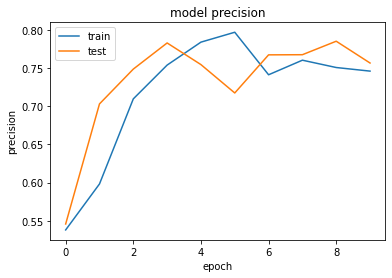

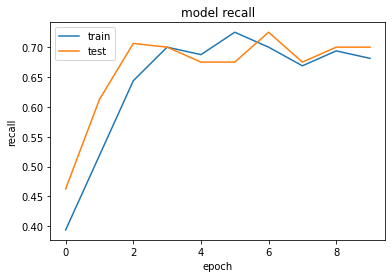

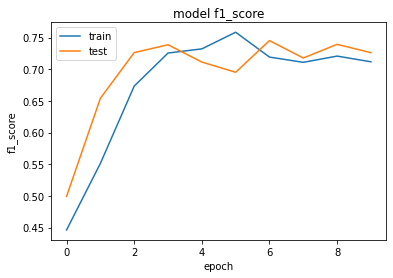

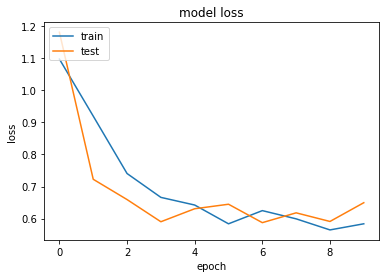

In [ ]:
# Exibindo dados de Precisão
plt.plot(history.history['precision_score'])
plt.plot(history.history['val_precision_score'])
plt.title('model precision')
plt.ylabel('precision')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Sensibilidade
plt.plot(history.history['recall_score'])
plt.plot(history.history['val_recall_score'])
plt.title('model recall')
plt.ylabel('recall')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de F1 Score
plt.plot(history.history['f1_score'])
plt.plot(history.history['val_f1_score'])
plt.title('model f1_score')
plt.ylabel('f1_score')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Exibindo dados de Perda
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

### 4.8.1 Conclusões sobre a abordagem adicional

Como seu modelo performou em comparação com os demais modelos anteriores? Justifique sua resposta levando em consideração a arquitetura respectiva.

**Resposta**: O MobileNetV2 é de uma família de arquiteturas que se propõe a disponibilizar o uso das redes neurais em aparelhos celulares, por isso é um modelo leve, com poucos parâmetros, e muito rápida. Esse modelo se mostrou eficiente para a pouca quantidade de épocas utilizadas, apresentando o melhor valor de precisão, mas não se mostrou tão equilibrado pois seu f1 score ficou abaixo dos obtidos pelo VGG16 e ResNet50. Em compensação, obteve menor valor de perda do que o melhor modelo, VGG16.